# Importing module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## importing CSV file

In [2]:
data=pd.read_csv("city_day.csv")

## Data overview

In [3]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


##  Data Cleaning

In [5]:
data=data.drop(["Benzene","Toluene","Xylene","NH3","PM10"],axis=1)
new_data=data.dropna()

In [6]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 28 to 29530
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        21592 non-null  object 
 1   Date        21592 non-null  object 
 2   PM2.5       21592 non-null  float64
 3   NO          21592 non-null  float64
 4   NO2         21592 non-null  float64
 5   NOx         21592 non-null  float64
 6   CO          21592 non-null  float64
 7   SO2         21592 non-null  float64
 8   O3          21592 non-null  float64
 9   AQI         21592 non-null  float64
 10  AQI_Bucket  21592 non-null  object 
dtypes: float64(8), object(3)
memory usage: 2.0+ MB


In [7]:
new_data[new_data["AQI_Bucket"]=="Good"]["City"].value_counts()

Hyderabad             141
Amaravati             135
Thiruvananthapuram    125
Kolkata               119
Guwahati              116
Shillong              107
Bengaluru              81
Aizawl                 73
Visakhapatnam          51
Chandigarh             48
Amritsar               34
Mumbai                 26
Gurugram               12
Chennai                12
Brajrajnagar            9
Lucknow                 6
Coimbatore              6
Talcher                 3
Bhopal                  2
Jaipur                  2
Ahmedabad               1
Name: City, dtype: int64

## To change color of bar graph with value

In [8]:
av_aqi=new_data[["City","CO"]].groupby("City").mean()
cc=['colors']*len(av_aqi["CO"])
for n,val in enumerate(av_aqi["CO"]):
    if val<2.0:
        cc[n]='g'
    elif val>2.0 and val<10.0:
        cc[n]='yellow'
    elif val>10.0 and val<17.0:
        cc[n]='gold'
    elif val>17.0:
        cc[n]='r'
print(cc)

['r', 'g', 'g', 'g', 'g', 'g', 'yellow', 'g', 'g', 'g', 'yellow', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g']


## Avg. AQI by city

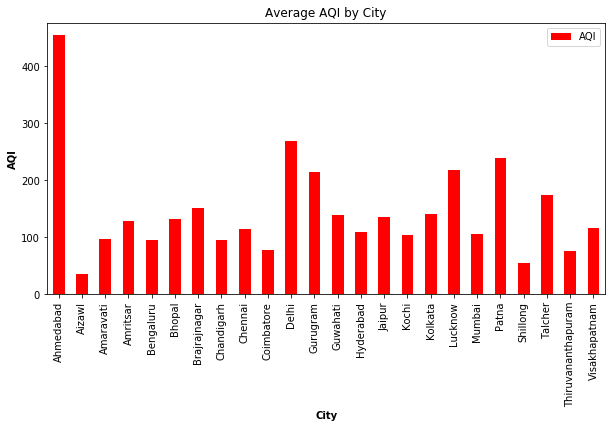

In [9]:
av_aqi=new_data[["City","AQI"]].groupby("City").mean().plot(kind='bar',color='r',figsize=(10,5))
plt.ylabel("AQI",fontweight='bold')
plt.xlabel("City",fontweight='bold')
plt.title("Average AQI by City")
plt.show()

## Avg. PM 2.5 by City

In [10]:
av_aqi
## blue unhealthy for sensitive people
## Red color for very unhealthy

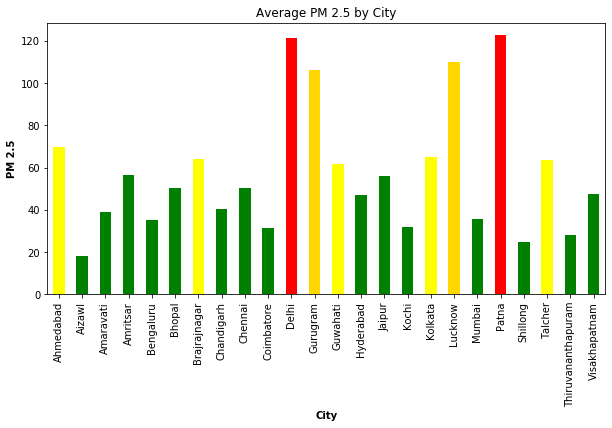

In [11]:
av_aqi=new_data[["City","PM2.5"]].groupby("City").mean()
av_aqi["PM2.5"].plot(kind='bar',color=['yellow', 'g', 'g', 'g', 'g', 'g', 'yellow', 'g', 'g', 'g', 'r', 'gold', 'yellow', 'g', 'g', 'g', 'yellow', 'gold', 'g', 'r', 'g', 'yellow', 'g', 'g'],figsize=(10,5))
plt.ylabel("PM 2.5",fontweight='bold')
plt.xlabel("City",fontweight='bold')
plt.title("Average PM 2.5 by City")
plt.show()

## Avg. PM10 By city

In [12]:
av_aqi
## Satisfactory unheathy for sensitve people
## unheathy for elederly, children and asthama patient

,PM2.5
City,
Ahmedabad,69.775516
Aizawl,18.089010
Amaravati,39.020164
Amritsar,56.521087
Bengaluru,35.170362
Bhopal,50.207230
Brajrajnagar,64.234812
Chandigarh,40.557102
Chennai,50.123137


In [13]:
new_data

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,6.93,28.71,33.72,6.93,49.52,59.76,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,13.85,28.68,41.08,13.85,48.49,97.07,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,7.68,25.06,19.54,0.47,8.55,23.30,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,3.42,26.06,16.53,0.52,12.72,30.14,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,3.45,29.53,18.33,0.48,8.42,30.96,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,4.05,29.26,18.80,0.52,9.84,28.30,54.0,Satisfactory


In [14]:
new_data["AQI_Bucket"].value_counts()

Moderate        7617
Satisfactory    7263
Poor            2432
Very Poor       2025
Severe          1146
Good            1109
Name: AQI_Bucket, dtype: int64

In [15]:
pd.to_datetime(new_data[(new_data['AQI_Bucket']=='Severe')&(new_data['City']=='Delhi')]['Date']).dt.year.value_counts()

2016    85
2017    44
2018    38
2019    36
2015    33
2020     3
Name: Date, dtype: int64

In [16]:
d=new_data[["AQI_Bucket","City"]].groupby(["City","AQI_Bucket"]).size()
d

City           AQI_Bucket  
Ahmedabad      Good              1
               Moderate        161
               Poor            229
               Satisfactory     39
               Severe          573
                              ... 
Visakhapatnam  Good             51
               Moderate        567
               Poor             72
               Satisfactory    441
               Very Poor        18
Length: 120, dtype: int64

In [17]:
new_data

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,6.93,28.71,33.72,6.93,49.52,59.76,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,13.85,28.68,41.08,13.85,48.49,97.07,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,7.68,25.06,19.54,0.47,8.55,23.30,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,3.42,26.06,16.53,0.52,12.72,30.14,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,3.45,29.53,18.33,0.48,8.42,30.96,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,4.05,29.26,18.80,0.52,9.84,28.30,54.0,Satisfactory


In [18]:
av_no=new_data[["NO","City"]].groupby("City").size()
av_no

City
Ahmedabad             1211
Aizawl                 101
Amaravati              795
Amritsar               644
Bengaluru             1769
Bhopal                 278
Brajrajnagar           611
Chandigarh             283
Chennai               1865
Coimbatore             287
Delhi                 1897
Gurugram               975
Guwahati               494
Hyderabad             1873
Jaipur                1001
Kochi                  150
Kolkata                747
Lucknow               1580
Mumbai                 742
Patna                 1368
Shillong               198
Talcher                532
Thiruvananthapuram    1042
Visakhapatnam         1149
dtype: int64

In [19]:
av_no=new_data[["NO2","City"]].groupby("City").mean()
av_no

,NO2
City,
Ahmedabad,60.619455
Aizawl,0.386238
Amaravati,22.554969
Amritsar,19.090435
Bengaluru,28.075483
Bhopal,31.373561
Brajrajnagar,17.062111
Chandigarh,12.060424
Chennai,16.465282


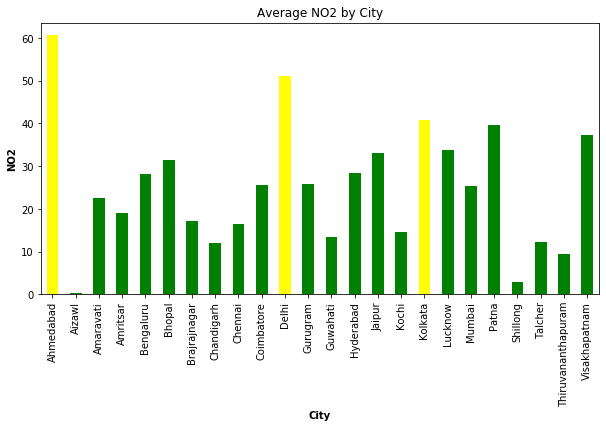

In [20]:
av_no["NO2"].plot(kind='bar',color=['yellow', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'yellow', 'g', 'g', 'g', 'g', 'g', 'yellow', 'g', 'g', 'g', 'g', 'g', 'g', 'g'],figsize=(10,5))
plt.ylabel("NO2",fontweight='bold')
plt.xlabel("City",fontweight='bold')
plt.title("Average NO2 by City")
plt.show()

In [21]:
av_so=new_data[["SO2","City"]].groupby("City").mean()
av_so

,SO2
City,
Ahmedabad,56.427696
Aizawl,7.130693
Amaravati,14.186226
Amritsar,9.333711
Bengaluru,5.337422
Bhopal,13.060432
Brajrajnagar,10.544092
Chandigarh,10.146572
Chennai,7.781995


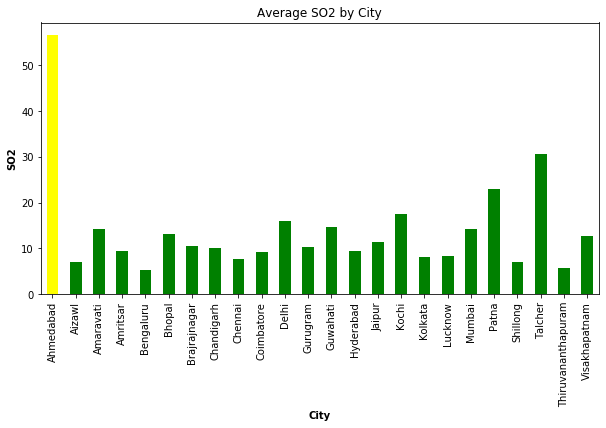

In [22]:
av_so["SO2"].plot(kind='bar',color=['yellow', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g'],figsize=(10,5))
plt.ylabel("SO2",fontweight='bold')
plt.xlabel("City",fontweight='bold')
plt.title("Average SO2 by City")
plt.show()

In [23]:
av_co=new_data[["CO","City"]].groupby("City").mean()
av_co

,CO
City,
Ahmedabad,22.061420
Aizawl,0.286535
Amaravati,0.618931
Amritsar,0.734441
Bengaluru,1.719486
Bhopal,0.880719
Brajrajnagar,2.060458
Chandigarh,0.624912
Chennai,0.982225


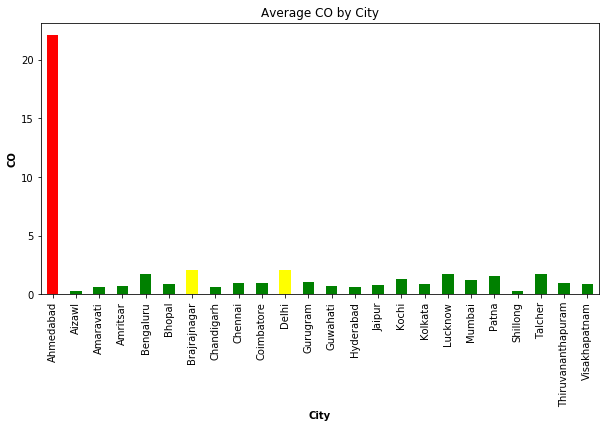

In [24]:
av_co["CO"].plot(kind='bar',color=['r', 'g', 'g', 'g', 'g', 'g', 'yellow', 'g', 'g', 'g', 'yellow', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g'],figsize=(10,5))
plt.ylabel("CO",fontweight='bold')
plt.xlabel("City",fontweight='bold')
plt.title("Average CO by City")
plt.show()

In [25]:
new_data['Date']=pd.to_datetime(new_data['Date'])
by_month=new_data[(new_data["City"]=="Delhi")].groupby([new_data.Date.dt.month,"City"]).mean()
by_month

C:\Users\rohan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI
Date,City,,,,,,,,
1,Delhi,197.485430,53.992581,57.017957,68.085591,3.056774,15.068011,49.730538,360.387097
2,Delhi,141.975529,45.856118,55.475353,66.981706,2.908235,15.890176,48.829824,298.829412
3,Delhi,87.573871,32.110323,43.957957,49.663817,2.524516,16.667957,44.452796,222.623656
4,Delhi,90.822682,32.565531,49.179162,52.002570,2.152402,21.733352,53.524581,248.206704
5,Delhi,92.209946,28.725161,51.855269,52.960699,2.313387,20.669409,62.751828,258.693548
6,Delhi,72.458217,17.074140,41.258344,44.366879,1.498535,11.229936,55.887962,213.471338
7,Delhi,49.237016,15.775806,34.573710,58.564758,1.318710,9.608790,41.540806,155.177419
8,Delhi,44.431935,20.739355,33.875242,61.307500,1.209919,9.445403,42.556855,146.709677
9,Delhi,56.916480,22.864640,38.692400,48.616160,1.077440,10.936560,48.178400,167.640000


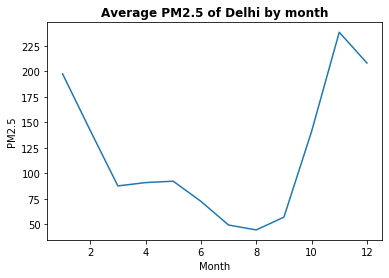

In [26]:
plt.ylabel("PM2.5")
plt.xlabel("Month")
plt.title("Average PM2.5 of Delhi by month",fontweight='bold')
plt.plot(by_month.index.get_level_values(0),by_month['PM2.5'])
plt.show()

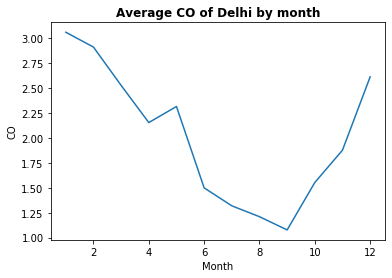

In [27]:
plt.ylabel("CO")
plt.xlabel("Month")
plt.title("Average CO of Delhi by month",fontweight='bold')
plt.plot(by_month.index.get_level_values(0),by_month["CO"])
plt.show()

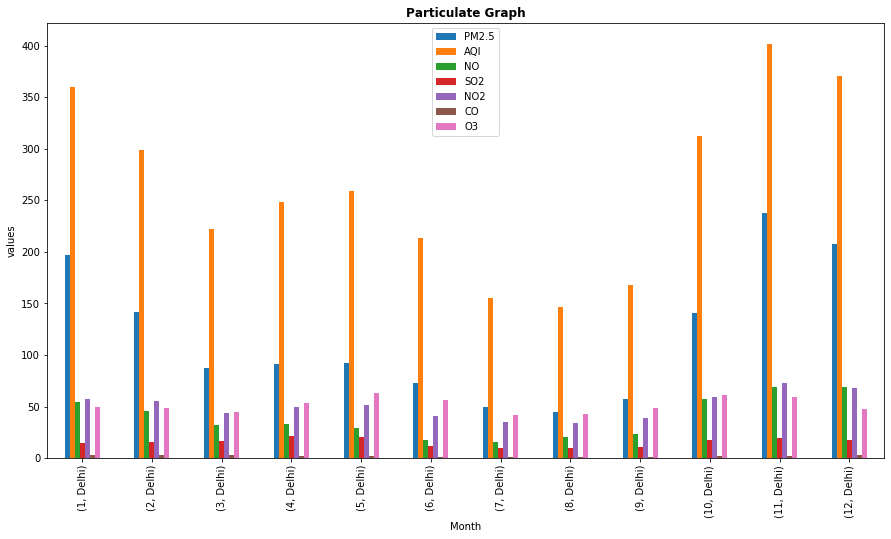

In [28]:
by_month[["PM2.5","AQI","NO","SO2","NO2","CO","O3"]].plot(kind='bar',figsize=(15,8))
plt.xlabel("Month")
plt.title("Particulate Graph",fontweight='bold')
plt.ylabel("values")
plt.show()

In [29]:
new_data['Date']=pd.to_datetime(new_data['Date'])
by_year=new_data[(new_data["City"]=="Delhi")].groupby([new_data.Date.dt.year,"City"]).mean()
by_year

C:\Users\rohan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI
Date,City,,,,,,,,
2015,Delhi,117.340822,32.911397,50.434384,81.786329,5.255151,12.606904,57.395507,297.024658
2016,Delhi,138.719562,50.829260,63.507589,75.611123,1.610521,18.819096,76.889205,301.369863
2017,Delhi,160.468150,59.663661,63.330591,46.183465,0.962441,23.888583,44.031378,325.240157
2018,Delhi,115.019397,36.496164,45.922521,57.259123,1.407068,13.642959,44.372438,249.158904
2019,Delhi,108.501479,32.114110,45.236027,53.247671,1.371616,14.031205,38.941014,232.104110
2020,Delhi,80.317978,22.692240,33.201749,38.840383,1.057760,13.912404,40.649891,181.672131


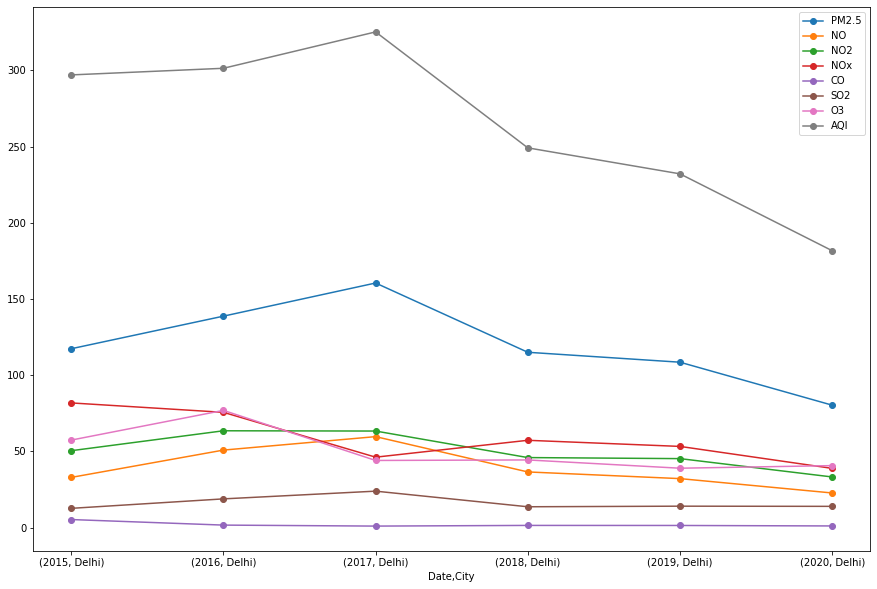

In [30]:
by_year.plot(figsize=(15,10),marker='o')

In [31]:
Mean_co_for_Delhi_Feb_2020=new_data[(new_data.Date.dt.month==2)&(new_data.Date.dt.year==2020)&(new_data.City=='Delhi')]['CO'].mean()

In [32]:
Mean_co_for_Delhi_Feb_2020

1.295172413793103

[]

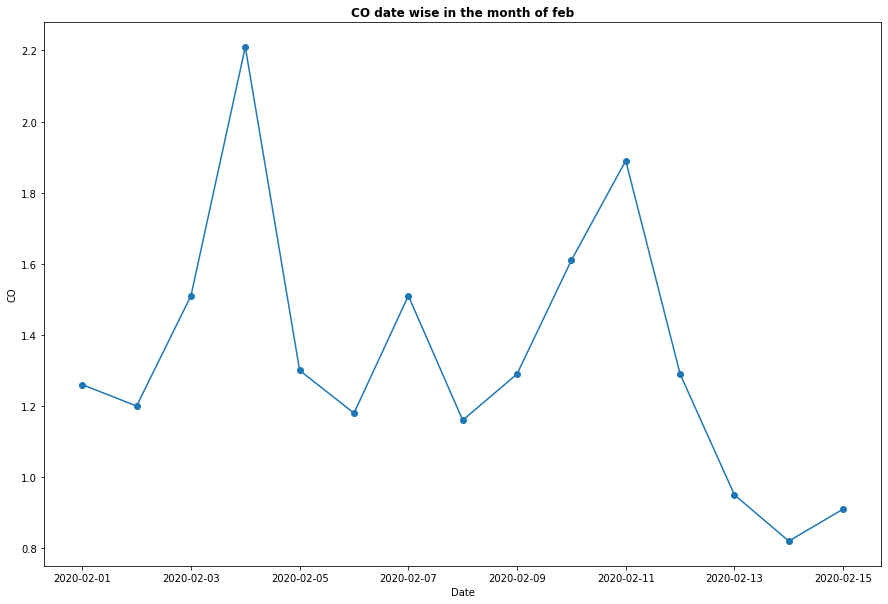

In [33]:
O=new_data[(new_data.Date.dt.month==2)&(new_data.Date.dt.year==2020)&(new_data.City=="Delhi")]
plt.figure(figsize=(15,10))
plt.plot(O['Date'].head(15),O['CO'].head(15),marker='o')
plt.xlabel("Date")
plt.ylabel("CO")
plt.title("CO date wise in the month of feb",fontweight='bold')
plt.plot()

In [34]:
mean_20=new_data[(new_data["City"]=='Delhi') & (new_data.Date.dt.year==2020)].groupby(new_data.Date.dt.year).mean()
mean_19=new_data[(new_data["City"]=='Delhi') & (new_data.Date.dt.year==2019)].groupby(new_data.Date.dt.year).mean()
mean_18=new_data[(new_data["City"]=='Delhi') & (new_data.Date.dt.year==2018)].groupby(new_data.Date.dt.year).mean()
mean_17=new_data[(new_data["City"]=='Delhi') & (new_data.Date.dt.year==2017)].groupby(new_data.Date.dt.year).mean()
mean_16=new_data[(new_data["City"]=='Delhi') & (new_data.Date.dt.year==2016)].groupby(new_data.Date.dt.year).mean()

In [35]:
mean_co=[float(mean_16["CO"]),float(mean_17["CO"]),float(mean_18["CO"]),float(mean_19["CO"]),float(mean_20["CO"])]

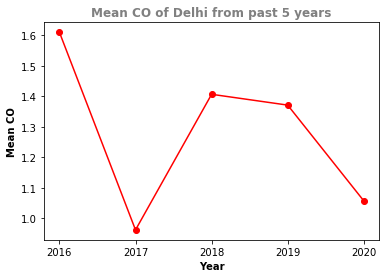

In [36]:
plt.plot(["2016","2017","2018","2019","2020"],mean_co,marker="o",color='r')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Mean CO",fontweight='bold')
plt.title("Mean CO of Delhi from past 5 years",fontweight='bold',color="grey")
plt.show()

In [37]:
mean_delhi=new_data[(new_data["City"]=='Delhi') & (new_data.Date.dt.year==2020)].groupby(new_data.Date.dt.month).mean()
mean_Ahmedabad=new_data[(new_data["City"]=='Ahmedabad') & (new_data.Date.dt.year==2020)].groupby(new_data.Date.dt.month).mean()
mean_Visakhapatnam=new_data[(new_data["City"]=='Visakhapatnam') & (new_data.Date.dt.year==2020)].groupby(new_data.Date.dt.month).mean()

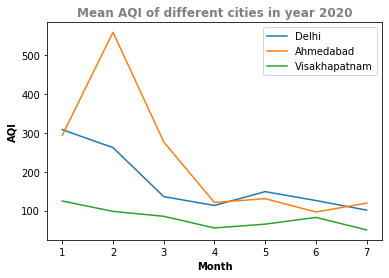

In [38]:
plt.plot(mean_delhi["AQI"],label="Delhi")
plt.plot(mean_Ahmedabad["AQI"],label="Ahmedabad")
plt.plot(mean_Visakhapatnam["AQI"],label="Visakhapatnam")
plt.legend()
plt.xlabel("Month",fontweight='bold')
plt.ylabel("AQI",fontweight='bold')
plt.title("Mean AQI of different cities in year 2020",fontweight='bold',color='grey')
plt.show()

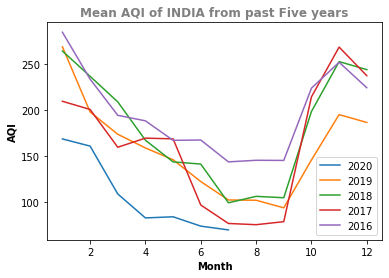

In [39]:
plt.title("Mean AQI of INDIA from past Five years",fontweight='bold',color='grey')
plt.plot(new_data[(new_data.Date.dt.year==2020)].groupby(new_data.Date.dt.month)["AQI"].mean(),label='2020')
plt.plot(new_data[(new_data.Date.dt.year==2019)].groupby(new_data.Date.dt.month)["AQI"].mean(),label='2019')
plt.plot(new_data[(new_data.Date.dt.year==2018)].groupby(new_data.Date.dt.month)["AQI"].mean(),label='2018')
plt.plot(new_data[(new_data.Date.dt.year==2017)].groupby(new_data.Date.dt.month)["AQI"].mean(),label='2017')
plt.plot(new_data[(new_data.Date.dt.year==2016)].groupby(new_data.Date.dt.month)["AQI"].mean(),label='2016')
plt.legend()
plt.xlabel("Month",fontweight='bold')
plt.ylabel("AQI",fontweight='bold')
plt.show()

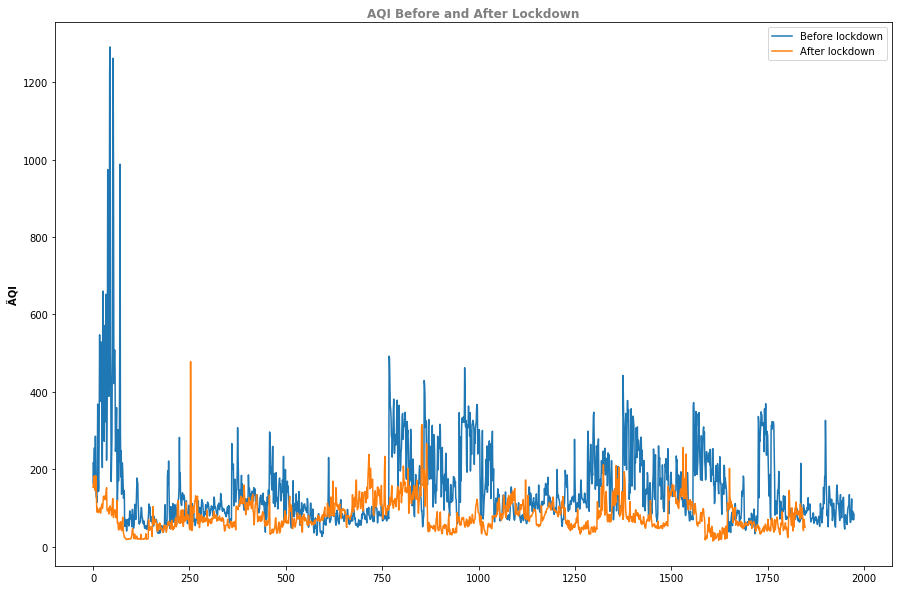

In [79]:
plt.figure(figsize=(15,10))
plt.plot(new_data[(new_data.Date.dt.month<=3) & (new_data.Date.dt.year==2020)]["AQI"].reset_index(drop='True'),label='Before lockdown')
plt.plot(new_data[(new_data.Date.dt.month>3) & (new_data.Date.dt.year==2020)]["AQI"].reset_index(drop='True'),label='After lockdown')
plt.legend()
plt.ylabel("ÄQI",fontweight='bold')
plt.title("AQI Before and After Lockdown",fontweight='bold',color='grey')
plt.show()

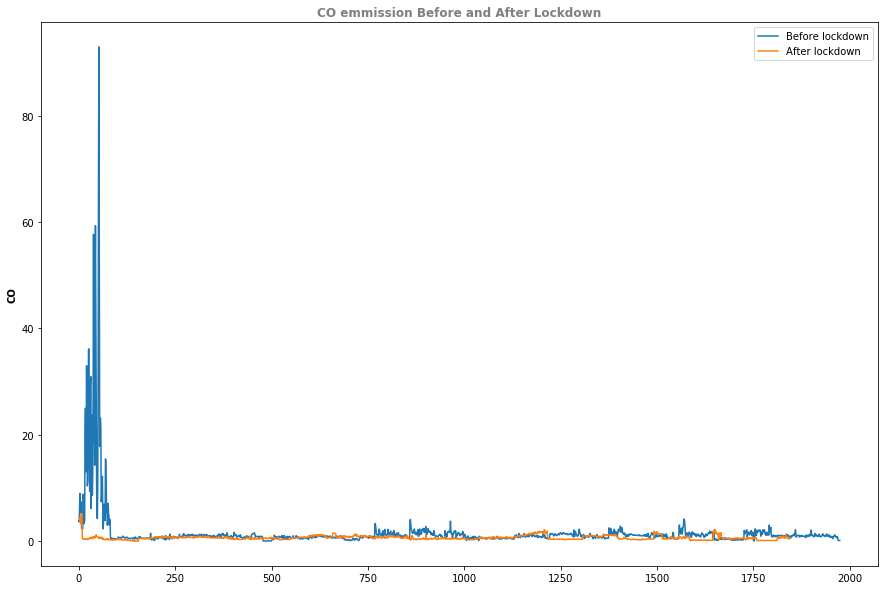

In [80]:
plt.figure(figsize=(15,10))
plt.plot(new_data[(new_data.Date.dt.month<=3) & (new_data.Date.dt.year==2020)]["CO"].reset_index(drop='True'),label='Before lockdown')
plt.plot(new_data[(new_data.Date.dt.month>3) & (new_data.Date.dt.year==2020)]["CO"].reset_index(drop='True'),label='After lockdown')
plt.legend()
plt.ylabel("CO",fontweight='bold')
plt.title("CO emmission Before and After Lockdown",fontweight='bold',color='grey')
plt.show()

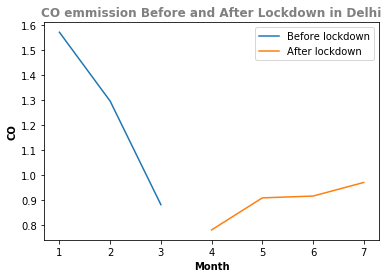

In [64]:
plt.plot(new_data[(new_data.Date.dt.month<=3) & (new_data.Date.dt.year==2020) & (new_data["City"]=='Delhi')].groupby(new_data.Date.dt.month)["CO"].mean(),label='Before lockdown')
plt.plot(new_data[(new_data.Date.dt.month>3) & (new_data.Date.dt.year==2020) & (new_data["City"]=='Delhi')].groupby(new_data.Date.dt.month)["CO"].mean(),label='After lockdown')
plt.legend()
plt.xlabel("Month",fontweight='bold')
plt.ylabel("CO",fontweight='bold')
plt.title("CO emmission Before and After Lockdown in Delhi",fontweight='bold',color='grey')
plt.show()

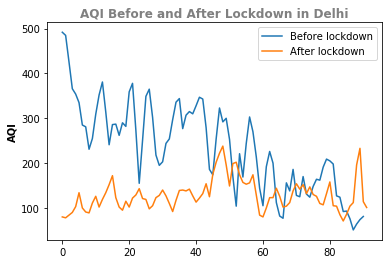

In [69]:
plt.plot(new_data[(new_data.Date.dt.month<=3) & (new_data.Date.dt.year==2020) & (new_data["City"]=='Delhi')]["AQI"].reset_index(drop='True'),label='Before lockdown')
plt.plot(new_data[(new_data.Date.dt.month>3) & (new_data.Date.dt.year==2020) & (new_data["City"]=='Delhi')]["AQI"].reset_index(drop='True'),label='After lockdown')
plt.legend()
plt.ylabel("AQI",fontweight='bold')
plt.title("AQI Before and After Lockdown in Delhi",fontweight='bold',color='grey')
plt.show()

In [66]:
new_data

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,6.93,28.71,33.72,6.93,49.52,59.76,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,13.85,28.68,41.08,13.85,48.49,97.07,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,7.68,25.06,19.54,0.47,8.55,23.30,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,3.42,26.06,16.53,0.52,12.72,30.14,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,3.45,29.53,18.33,0.48,8.42,30.96,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,4.05,29.26,18.80,0.52,9.84,28.30,54.0,Satisfactory
